### Double Well Potential: V(x) = 1$x^{4}$ - 3$x^{2}$

This section investigated the above Potential. This can be graphically seen superimposed over the first 4 Eigenvectors of the subsequent Hamiltonian obtained using the FDM approach. 

It can be seen that as V(x) approaches what we can effectively consider $\inf$ in this case, the wavefunction amplitude tends to 0 for all Eigenstates, implying that this massive potential acts as a barrier for any particle within this range, almost like the particle in a box situation. 

In [2]:
import numpy as np
def double_well_potential(a,b,c,x):
    return (a*pow(x,4) - b*pow(x,2) + c)
values = np.linspace(-5,5,1000)
double_well_vals = [double_well_potential(1,3,0,i) for i in values]

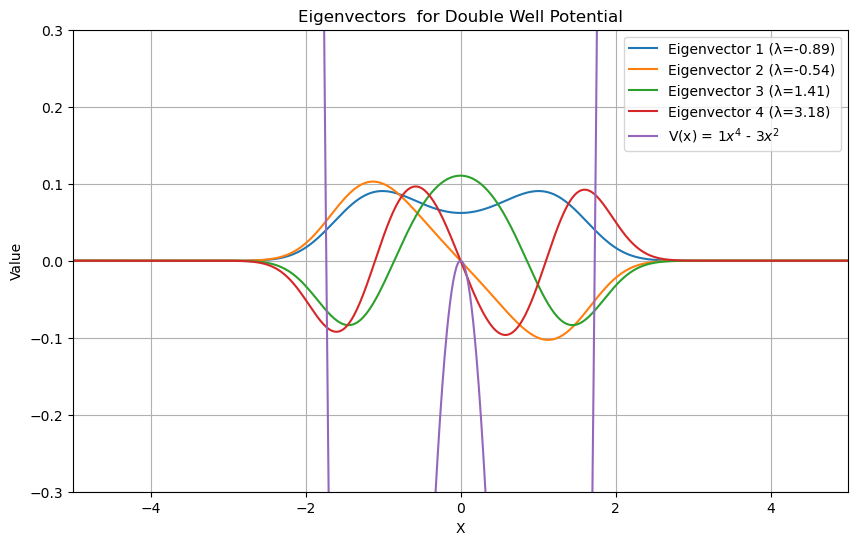

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_eigenvectors(filename):
    # Read the file
    with open(filename, 'r') as file:
        lines = file.readlines()

    # First line contains the eigenvalues
    eigenvalues = np.array([float(value) for value in lines[1].strip().split('\t')])

    # The remaining lines contain the eigenvectors
    eigenvectors = np.array([[float(value) for value in line.strip().split('\t')] for line in lines[3:]])

    # Number of eigenvectors
    num_eigenvectors = eigenvectors.shape[1]

    plt.figure(figsize=(10, 6))
    
    # Plot each eigenvector
    for i in range(1,5):
        plt.plot(eigenvectors[:,0],eigenvectors[:, i], label=f'Eigenvector {i} (λ={eigenvalues[i-1]:.2f})')
        
    plt.plot(values, double_well_vals, label = 'V(x) = 1$x^{4}$ - 3$x^{2}$')
    # Add legend, labels, and title
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Value')
    plt.xlim(-5,5)
    plt.ylim(-0.3,0.3)
    plt.title('Eigenvectors  for Double Well Potential')
    plt.grid()

    # Show the plot
    plt.savefig('Double_Well_Potential.png')
    plt.show()
    

# Filename containing the eigenvalues and eigenvectors
filename = 'Double_Well_Potential.txt'

# Plot the eigenvectors
plot_eigenvectors(filename)


We can see in the above, our first few Eigenvalues are negative. In the context of QM, this means that these eigenstates are bound within the Double-Well, with insufficient energy to escape. Once you reach n=3 however we start trending upwards from 0. 

The shapes of the Eigenvectors are interestign here also. For the ground state, we can see two maxima, within each well, with no node inbetween. This indicates that the particle is most likely to be found in either centre of both wells. The non-negative value at the barrier also indicates Quantum Mechanical tunnelling occurs between both wells. $\Psi$ is also symmetric in this case with respect to 0, similar to V(x). 

Both of the Odd wavefunction solutions contain a node at x = 0. This is interesting, as it means the particle cannot exist in this location. Therefore for the odd eigenstate solutions, the particle must oscillate between both wells. This increased oscillation increases position uncertainty $\Delta p$ therefore reducing $\Delta x$ by the Heisenberg Uncertainty Principle. 

### Quantum Harmonic Oscillator $V(x) = \frac{1}{2} x^{2}$

In [4]:
def harmonic_oscillator(m, omega, x):
    return (0.5*m*omega*omega*x*x)
values = np.linspace(-5,5,1000)
qho_vals = [harmonic_oscillator(1,1,i) for i in values]

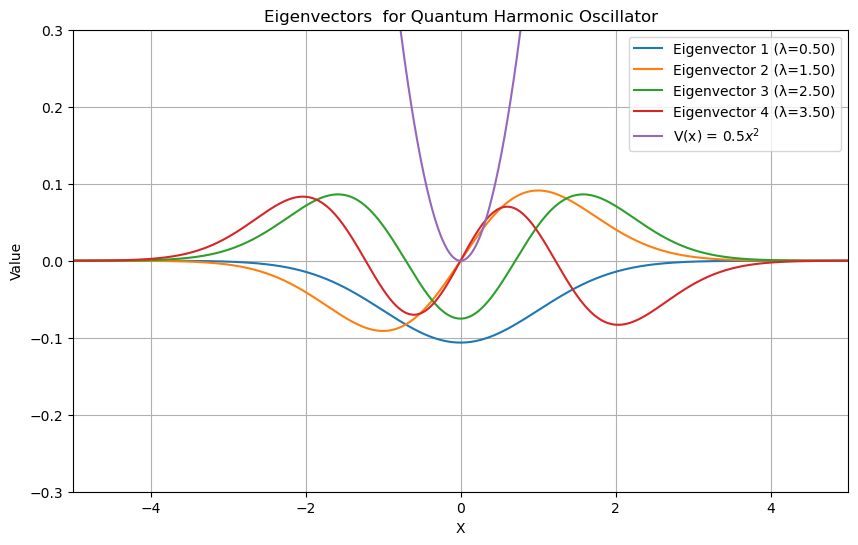

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_eigenvectors(filename):
    # Read the file
    with open(filename, 'r') as file:
        lines = file.readlines()

    # First line contains the eigenvalues
    eigenvalues = np.array([float(value) for value in lines[1].strip().split('\t')])

    # The remaining lines contain the eigenvectors
    eigenvectors = np.array([[float(value) for value in line.strip().split('\t')] for line in lines[3:]])

    # Number of eigenvectors
    num_eigenvectors = eigenvectors.shape[1]

    plt.figure(figsize=(10, 6))
    
    # Plot each eigenvector
    for i in range(1,5):
        plt.plot(eigenvectors[:,0],eigenvectors[:, i], label=f'Eigenvector {i} (λ={eigenvalues[i-1]:.2f})')
        
    plt.plot(values, qho_vals, label = 'V(x) = 0.5$x^{2}$')
    # Add legend, labels, and title
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Value')
    plt.xlim(-5,5)
    plt.ylim(-0.3,0.3)
    plt.title('Eigenvectors  for Quantum Harmonic Oscillator')
    plt.grid()

    # Show the plot
    plt.savefig('Quantum_Harmonic_Oscillator.png')
    plt.show()
    
# Filename containing the eigenvalues and eigenvectors
filename = 'Quantum_Harmonic_Oscillator.txt'

# Plot the eigenvectors
plot_eigenvectors(filename)


Again we have a similar story with the Quantum Harmonic Oscillator, with odd solutions containing a node, and even being without. Also, the Eigenvalues match the known literature values: $E_{N} = \frac{n+1}{2}\hbar\omega$, where we have $\hbar$ & $\omega$ defaulted to 1. 

In [10]:
import os

# Specify the directory you want to iterate through
directory = 'Perturbation/'

eigenvals_1 = []
eigenvals_2 = []
lambda_vals = np.linspace(0.001,0.3,300)
# Iterate through all files in the specified directory
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)
    
    # Check if it's a regular file and has a .txt extension
    if os.path.isfile(file_path) and filename.endswith('.txt'):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            eigenvals_1.append(float(lines[1].split('\t')[0]))
            eigenvals_2.append(float(lines[1].split('\t')[1]))
            

In [45]:
with open("Quantum_Harmonic_Oscillator.txt", 'r') as file:
        lines = file.readlines()
        eigenvalues_A = np.array([float(value) for value in lines[1].strip().split('\t')])
        eigenvectors_A = np.array([[float(value) for value in line.strip().split('\t')] for line in lines[3:]])

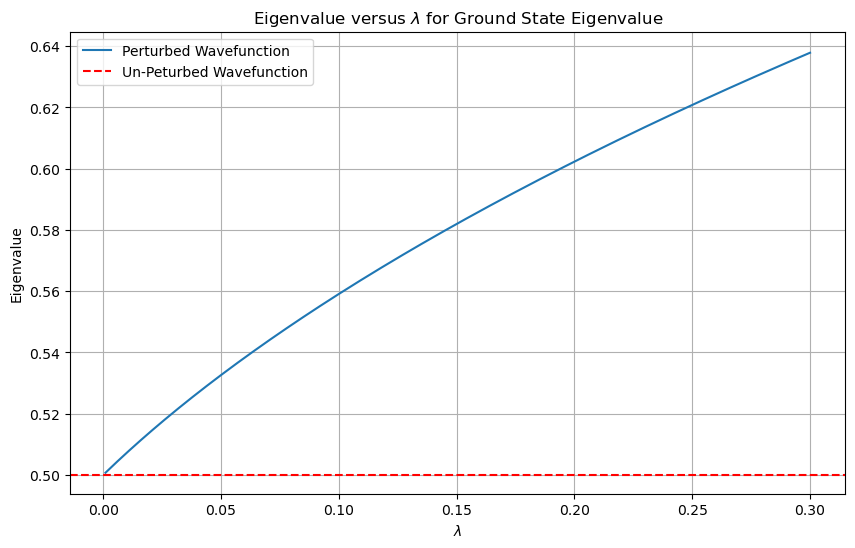

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, eigenvals_1, label = 'Perturbed Wavefunction')
# Add legend, labels, and title
plt.xlabel('$\lambda$')
plt.ylabel('Eigenvalue')
plt.axhline(eigenvalues[0], color = 'r', linestyle = '--', label = 'Un-Peturbed Wavefunction')
plt.title('Eigenvalue versus $\lambda$ for Ground State Eigenvalue')
plt.legend()
plt.grid()
plt.savefig('Unpeturbed-Perturbed Ground State Eigenvalue.png')

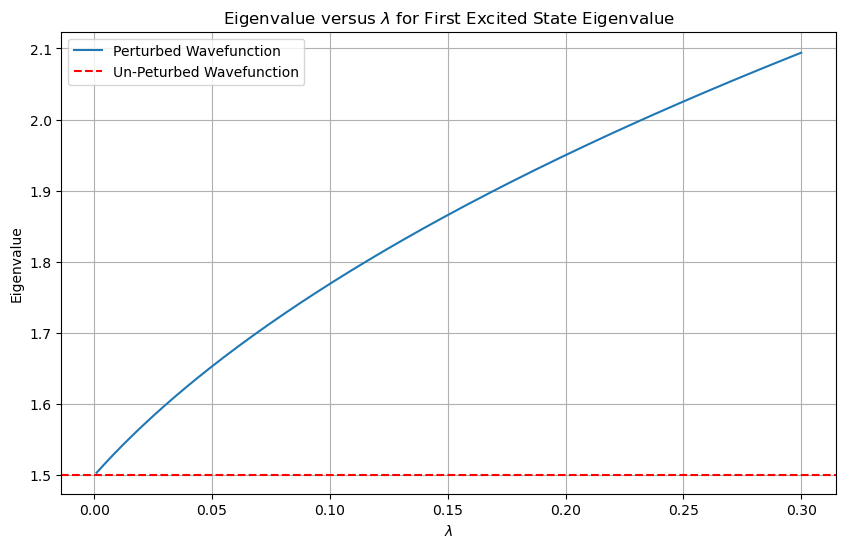

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, eigenvals_2, label = 'Perturbed Wavefunction')
# Add legend, labels, and title
plt.xlabel('$\lambda$')
plt.ylabel('Eigenvalue')
plt.axhline(eigenvalues[1], color = 'r', linestyle = '--', label = 'Un-Peturbed Wavefunction')
plt.title('Eigenvalue versus $\lambda$ for First Excited State Eigenvalue')
plt.legend()
plt.grid()
plt.savefig('Unpeturbed-Perturbed First Excited State Eigenvalue.png')

In the above, we can see that as $\lambda$ increases, the solution for these Eigenvalues diverges from the known analytical solution. This intuitively makes sense, (at least in my mind). 

As the lambda term increases, this causes the potential to change from the known analytical potential also, which subsequently alters the Hamiltonian. Therefore the Eigenvalues will subsequently be changed. The exact amount $\lambda$ changes the Eigenvalues will be analytically determined in the PDF atached with this project, using the Ladder Operators $a^{\dagger}$ and $a$. Now to see the Eigenvectors. 

We'll compare the non-perturbed example to the $\lambda$ = 0.3 eigenvector. This should have whatever effect an increasing perturbation caused to be more accentuated, making discussion a bit nicer.

In [46]:
with open(r"C:\Users\conor\Documents\C++\Finite Difference Method\Perturbation\0.300000.txt", 'r') as file:
        lines = file.readlines()
        lines[3:]
        eigenvectors_B = np.array([[float(value) for value in line.strip().split('\t')] for line in lines[3:]])
        x_grid = eigenvectors_B[:,0]
        ground_state = eigenvectors_B[:,1]
        excited_state = eigenvectors_B[:,2]

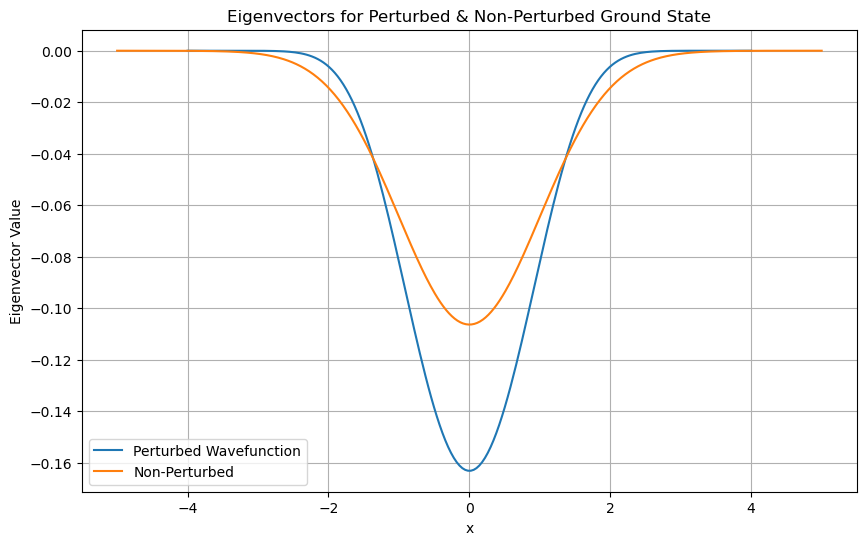

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(x_grid, ground_state, label = 'Perturbed Wavefunction')
plt.plot(eigenvectors_A[:,0],eigenvectors_A[:, 1], label='Non-Perturbed')
# Add legend, labels, and title
plt.xlabel('x')
plt.ylabel('Eigenvector Value')
plt.title('Eigenvectors for Perturbed & Non-Perturbed Ground State')
plt.legend()
plt.grid()
plt.savefig('Unpeturbed-Perturbed Ground State Eigenvector.png')

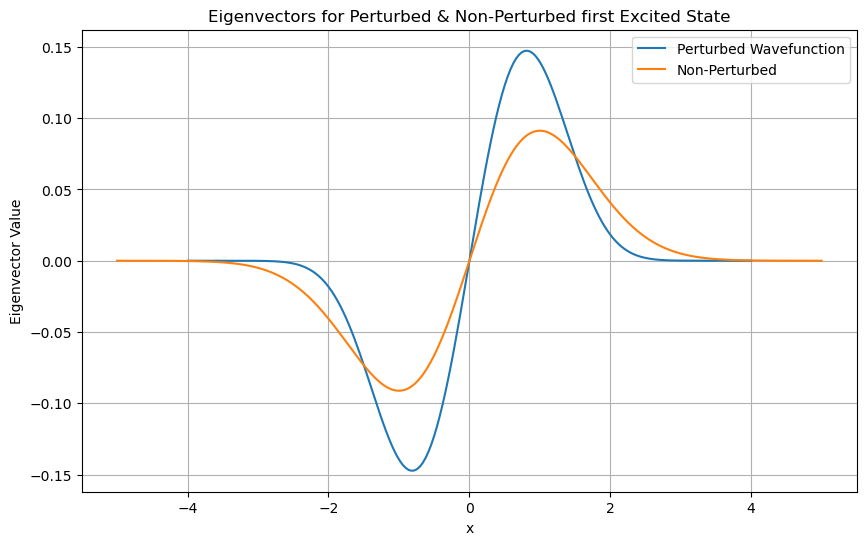

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(x_grid, excited_state, label = 'Perturbed Wavefunction')
plt.plot(eigenvectors_A[:,0],eigenvectors_A[:, 2], label='Non-Perturbed')
# Add legend, labels, and title
plt.xlabel('x')
plt.ylabel('Eigenvector Value')
plt.title('Eigenvectors for Perturbed & Non-Perturbed first Excited State')
plt.legend()
plt.grid()
plt.savefig('Unpeturbed-Perturbed First Excited State Eigenvector.png')